<a href="https://colab.research.google.com/github/Jash-Bhatia/Exploratory-Data-Analysis/blob/main/Quantitative-Stats/Quant_Stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Data Types

In [2]:
depression = pd.read_csv("depression.csv")

**Here is a summary of the variables in our dataset:**



Hospt: The patient's hospital, represented by a code for each of the 5 hospitals (1, 2, 3, 5, or 6)


Treat: The treatment received by the patient (Lithium, Imipramine, or Placebo)


Outcome: Whether or not a recurrence occurred during the patient's treatment (Recurrence or No Recurrence)


Time: Either the time in days till the first recurrence, or if a recurrence did not occur, the length in days of the patient's participation in the study.


AcuteT: The time in days that the patient was depressed prior to the study.


Age: The age of the patient in years, when the patient entered the study.


Gender: The patient's gender (1 = Female, 2 = Male)

In [3]:
depression.drop(columns=['Unnamed: 0'],inplace=True)

In [22]:
depression.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,0,1,36.143002,211,33,1
1,1,1,0,105.142998,176,49,1
2,1,1,0,74.570999,191,50,1
3,1,0,1,49.714001,206,29,2
4,1,0,0,14.429000,63,29,1
...,...,...,...,...,...,...,...
104,6,2,1,20.857000,207,43,1
105,6,2,1,18.285999,102,29,1
106,6,1,1,31.857000,154,28,1
107,6,1,1,22.000000,203,51,1


In [5]:
depression.dtypes

Hospt        int64
Treat        int64
Outcome      int64
Time       float64
AcuteT       int64
Age          int64
Gender       int64
dtype: object

**Q. What are the categorical variables in this dataset?**


The categorical variables are 

1) Hostp because the numbers represent codes, which are used to identify individual hospitals and place them into categories.
As such, the numbers used for the codes (1, 2, 3, 5, and 6) have no arithmetic meaning 

2) Treat because the treatment received by the patients is in the form of categories (Lithium, Imipramine, or Placebo); 

3) Outcome since recurrence is in the form of two categories (Recurrence or No Recurrence) and 

4) Gender because the numbers represent two distinct categories: Female and Male.
Thus, the numbers used to represent gender (1 = Female; 2 = Male) have no arithmetic meaning.


Since these columns are not of categorical/object data type, we do the required conversions

In [6]:
depression['Hospt'] = depression['Hospt'].astype(object)
depression['Gender'] = depression['Gender'].astype(object)
depression['Treat'] = depression['Treat'].astype(object)
depression['Outcome'] = depression['Outcome'].astype(object)

In [7]:
depression.dtypes

Hospt       object
Treat       object
Outcome     object
Time       float64
AcuteT       int64
Age          int64
Gender      object
dtype: object

**Q. What are the quantitative variables in this dataset?**


The quantitative variables are 

1) Time since it can take on multiple numerical values, which have arithmetic meaning (i.e., it makes sense to add, subtract, multiply, divide, or compare the magnitude of such values). In our dataset time is described in terms of no.of days, hence we leave it in its float format 


2) Age since it can take on multiple numerical values, which represent a characteristic of the patient and 

3) AcuteT because it can take on multiple numerical values to represent a characteristic of the patient.



# Tallying Data and Creating Pie Charts


The same survey that asked 1,200 U.S. college students about their body perception also asked the following question:


"With whom do you find it easiest to make friends?" (opposite sex, same sex or no difference).


In this activity we will use the collected data to:

learn how to tally our data into a table of counts and percents.

learn how to produce a pie chart.

In [8]:
friends = pd.read_csv("friends.csv")

In [9]:
friends

,Unnamed: 0,Friends
0,1,No difference
1,2,No difference
2,3,No difference
3,4,No difference
4,5,No difference
...,...,...
1195,1196,Same sex
1196,1197,Same sex
1197,1198,Same sex
1198,1199,Same sex


In [10]:
friends.drop(columns="Unnamed: 0",inplace=True)
friends

,Friends
0,No difference
1,No difference
2,No difference
3,No difference
4,No difference
...,...
1195,Same sex
1196,Same sex
1197,Same sex
1198,Same sex


In [11]:
friends.describe()

,Friends
count,1200
unique,3
top,No difference
freq,602


In [12]:
friends['Friends'].value_counts()

No difference    602
Opposite sex     434
Same sex         164
Name: Friends, dtype: int64

In [13]:
round(friends['Friends'].value_counts()/len(friends),3)

No difference    0.502
Opposite sex     0.362
Same sex         0.137
Name: Friends, dtype: float64

([<matplotlib.patches.Wedge at 0x7f584f744810>,
 [Text(-0.005759554721866945, 1.0999849215009294, ''),
  Text(-0.45266576442884915, -1.0025436178611113, ''),
  Text(1.0001597573937753, -0.45790878970601206, '')])

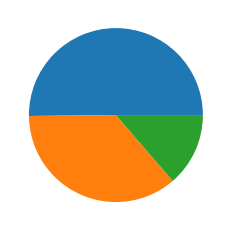

In [14]:
## plotting pie chart

data = friends['Friends'].value_counts()/len(friends)
plt.pie(data)

([<matplotlib.patches.Wedge at 0x7f584f2704d0>,
 [Text(-0.005759554721866945, 1.0999849215009294, 'No difference'),
  Text(-0.45266576442884915, -1.0025436178611113, 'Opp sex'),
  Text(1.0001597573937753, -0.45790878970601206, 'Same sex')],
 [Text(-0.0031415753028365147, 0.5999917753641433, '50.2%'),
  Text(-0.24690859877937224, -0.5468419733787879, '36.2%'),
  Text(0.54554168585115, -0.24976843074873384, '13.7%')])

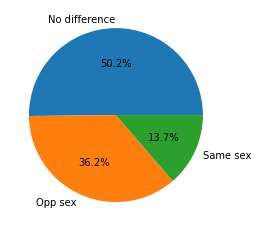

In [15]:
## adding labels

label = ['No difference', 'Opp sex', 'Same sex']

plt.pie(data,labels=label, autopct='%1.1f%%')

**Q. Describe the distribution of the variable "friends" in context:**


The students are NOT divided equally among the three categories. About 50% of the students find it as easy to make friends with the opposite sex as with the same sex. Among the remaining 50% of the students, the majority (36.2%) find it easier to make friends with people of the opposite sex, and the remainder (13.7%) find it easier to make friends with people of their own sex.




# Creating and Describing Histograms



We will use the Best Actor Oscar winners (1970-2013) to learn how to create a histogram using a statistics package, and practice what we've learned about describing the histogram.


In this activity, we will use the Best Actor Oscar winners (1970-2013) to:

Learn how to use a statistics package to produce the numerical measures, or "descriptive statistics" of a distribution.

Get some information about the distribution from its five-number summary.

In [16]:
actor_age = pd.read_csv("actor_age.csv")
actor_age.drop(columns='Unnamed: 0',inplace=True)
actor_age.describe()

,Age
count,44.000000
mean,44.977273
std,9.749153
min,29.000000
25%,38.000000
50%,43.500000
75%,50.250000
max,76.000000


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Ages Of Actors Winning Oscars')]

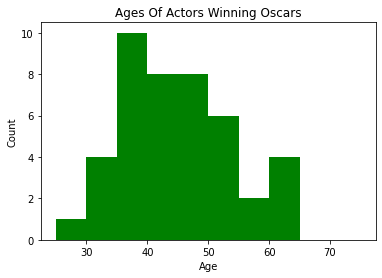

In [17]:
plt.hist(actor_age['Age'],bins=[25,30,35,40,45,50,55,60,65,70,75],color='green')
plt.gca().set(xlabel='Age', ylabel='Count', title='Ages Of Actors Winning Oscars')

**Q. In the textbox below, describe the distribution of the ages of the Best Actor Oscar winners. Be sure to address shape, center, spread and outliers. When you are done, compare your answer to ours.**


Shape: the distribution is skewed right. This means that most actors receive the best acting Oscar at a relatively younger age (before age 48), and fewer at an older age.


Center: The distribution seems to be centered at around 42-43. This means that about half the actors are 42 or younger when they receive the Oscar, and about half are older.


Spread: The age distribution ranges from about 30 to about 75. The entire dataset is covered, then, by a range of 45 years. It should be noted, though, that there is one high outlier at around age 75, and the rest of the data ranges only from 30 to 60.


Outliers: As mentioned above, there is one high outlier at around age 75.


**Q. Getting information from the output: a. How many observations are in this data set? b. What is the mean age of the actors who won the Oscar? c. What is the five-number summary of the distribution?**


a. There are n = 44 observations in the data set (representing the age of the Best Actor Oscar winners of the 44 years from 1970 through 2013).


b. Mean = 44.98


c. The five-number summary is: min = 29, Q1 = 38, M = 43.5, Q3 = 50.5, Max = 76



**Q. Get information from the five-number summary: a. Half of the actors won the Oscar before what age? b. What is the range covered by all the actors' ages? c. What is the range covered by the middle 50% of the ages?**


a. Half the actors won the Oscar before age 43.5 (the median). 

b. The range covered by all the ages is: Range = Max - min = 76 - 29 = 47. 

c. The range covered by the middle 50% of the ages is: IQR = Q3 - Q1 = 50.5 - 38 = 12.5


# Creating Side-by-Side Boxplots


The objectives of this activity are:


to learn how to use to produce side-by-side boxplots and the relevant descriptive statistics,


to practice comparing and contrasting distributions, and


to gain more intuition about variability through the interpretation of your results in context.


The percentage of each entering Freshman class that graduated on time was recorded for each of six colleges at a major university over a period of several years. (Source: This data is distributed with the software package, Data Desk. (1993). Ithaca, NY: Data Description, Inc., and appears in http://lib.stat.cmu.edu/DASL/)


In order to compare the graduation rates among the different colleges, we will create side-by-side boxplots (graduation rate by college), and supplement the graph with numerical measures. Follow the instructions, and then answer the questions based on the output you got.



In [18]:
grad = pd.read_csv('grad_data.csv')
grad.drop(columns='Unnamed: 0', inplace = True)
grad.describe()

,College.A,College.B,College.C,College.D,College.E,College.F
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,60.962500,71.287500,65.175000,79.112500,60.775000,72.775000
std,11.955027,3.061483,8.279018,3.853547,5.892307,11.116108
min,43.200000,67.300000,54.500000,74.100000,54.500000,57.700000
25%,50.950000,69.550000,56.575000,76.650000,56.875000,65.050000
50%,63.750000,70.150000,67.650000,79.000000,59.150000,72.000000
75%,70.500000,73.050000,71.575000,81.100000,63.700000,81.275000
max,73.800000,76.700000,74.800000,84.600000,71.300000,87.400000


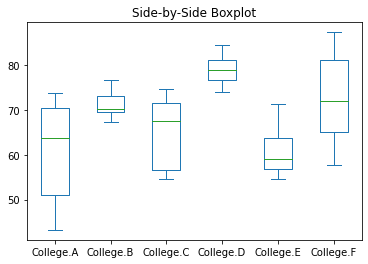

In [19]:
grad.plot(kind = 'box', legend = True, title = 'Side-by-Side Boxplot')

# Calculating the Standard Deviation




The concept of standard deviation is less intuitive as a measure of spread than the range or the IQR. The following activity is designed to help develop a better intuition for the standard deviation.


Background: At the end of a statistics course, the 27 students in the class were asked to rate the instructor on a number scale of 1 to 9 (1 being "very poor," and 9 being "best instructor I've ever had"). The following table provides three hypothetical rating data



In [23]:
ratings = pd.read_csv('ratings.csv')
ratings

,Unnamed: 0,Class.I,Class.II,Class.III
0,1,1,1,1
1,2,1,1,2
2,3,5,1,3
3,4,5,1,4
4,5,5,1,5
5,6,5,1,6
6,7,5,1,7
7,8,5,1,8
8,9,5,1,9
9,10,5,1,1


In [24]:
ratings.drop(columns='Unnamed: 0', inplace = True)
ratings.describe()

,Class.I,Class.II,Class.III
count,27.000000,27.0,27.000000
mean,5.000000,5.0,5.000000
std,1.568929,4.0,2.631174
min,1.000000,1.0,1.000000
25%,5.000000,1.0,3.000000
50%,5.000000,5.0,5.000000
75%,5.000000,9.0,7.000000
max,9.000000,9.0,9.000000


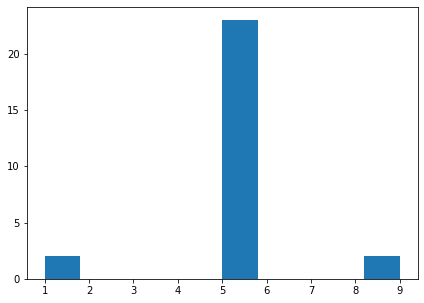

In [33]:
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 5))
ax.hist(ratings['Class.I'])
 
# Show plot
plt.show()

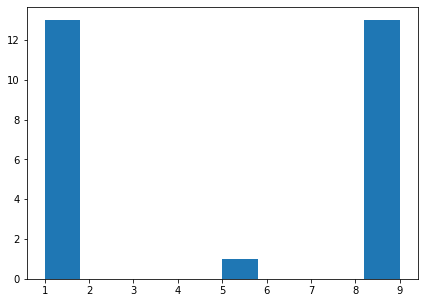

In [34]:
fig, ax = plt.subplots(figsize =(7, 5))
ax.hist(ratings['Class.II'])
plt.show()

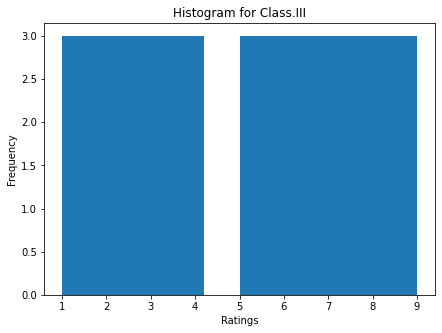

In [35]:
fig, ax = plt.subplots(figsize =(7, 5))
ax.hist(ratings['Class.III'])
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title('Histogram for Class.III')
plt.show()

**Q. What are the standard deviations of the three rating distributions? Was your intuition correct?**


Here are the three standard deviations:Class I: 1.6,  Class II: 4.0, Class III: 2.6. Note that through this example, we also learn that the number of distinct values represented in a histogram does not necessarily indicate greater variability.



**Q. Assume that the average rating in each of the three classes is 5 (which should be visually reasonably clear from the histograms), and recall the interpretation of the SD as a "typical" or "average" distance between the data points and their mean. Judging from the table and the histograms, which class would have the largest standard deviation, and which one would have the smallest standard deviation? Explain your reasoning.**


In class I, almost all the ratings are 5, which is also the mean. The average distance between the observations and the mean, then, would be very small. In class II most of the observations are far from the mean (at 1 or 9). The average distance between the observations and the mean in this case would be larger. Class III is the case where some of the observations are close to the mean, and some are far, so the average distance between the observations and the mean would be somewhere in between class I and II. This observation would lead me to conclude that the standard deviation would be ranked (from smallest to largest): Class I, Class III, Class II.